In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()

In [2]:
dataset = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("shape: ")
print(dataset.shape)
print("columns:") 
print(dataset.columns)

shape: 
(1460, 81)
columns:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

In [5]:
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

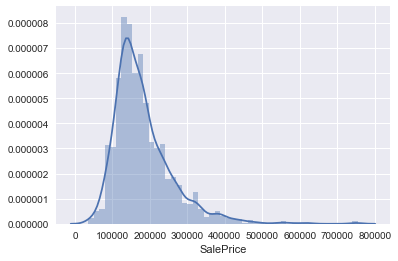

In [6]:
sns.distplot(dataset['SalePrice'])


In [7]:
print("Skewness: %f" % dataset['SalePrice'].skew())
print("Kurtosis: %f" % dataset['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [8]:
CorrelationMatrix = dataset.corr()
CorrelationMatrix["SalePrice"].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

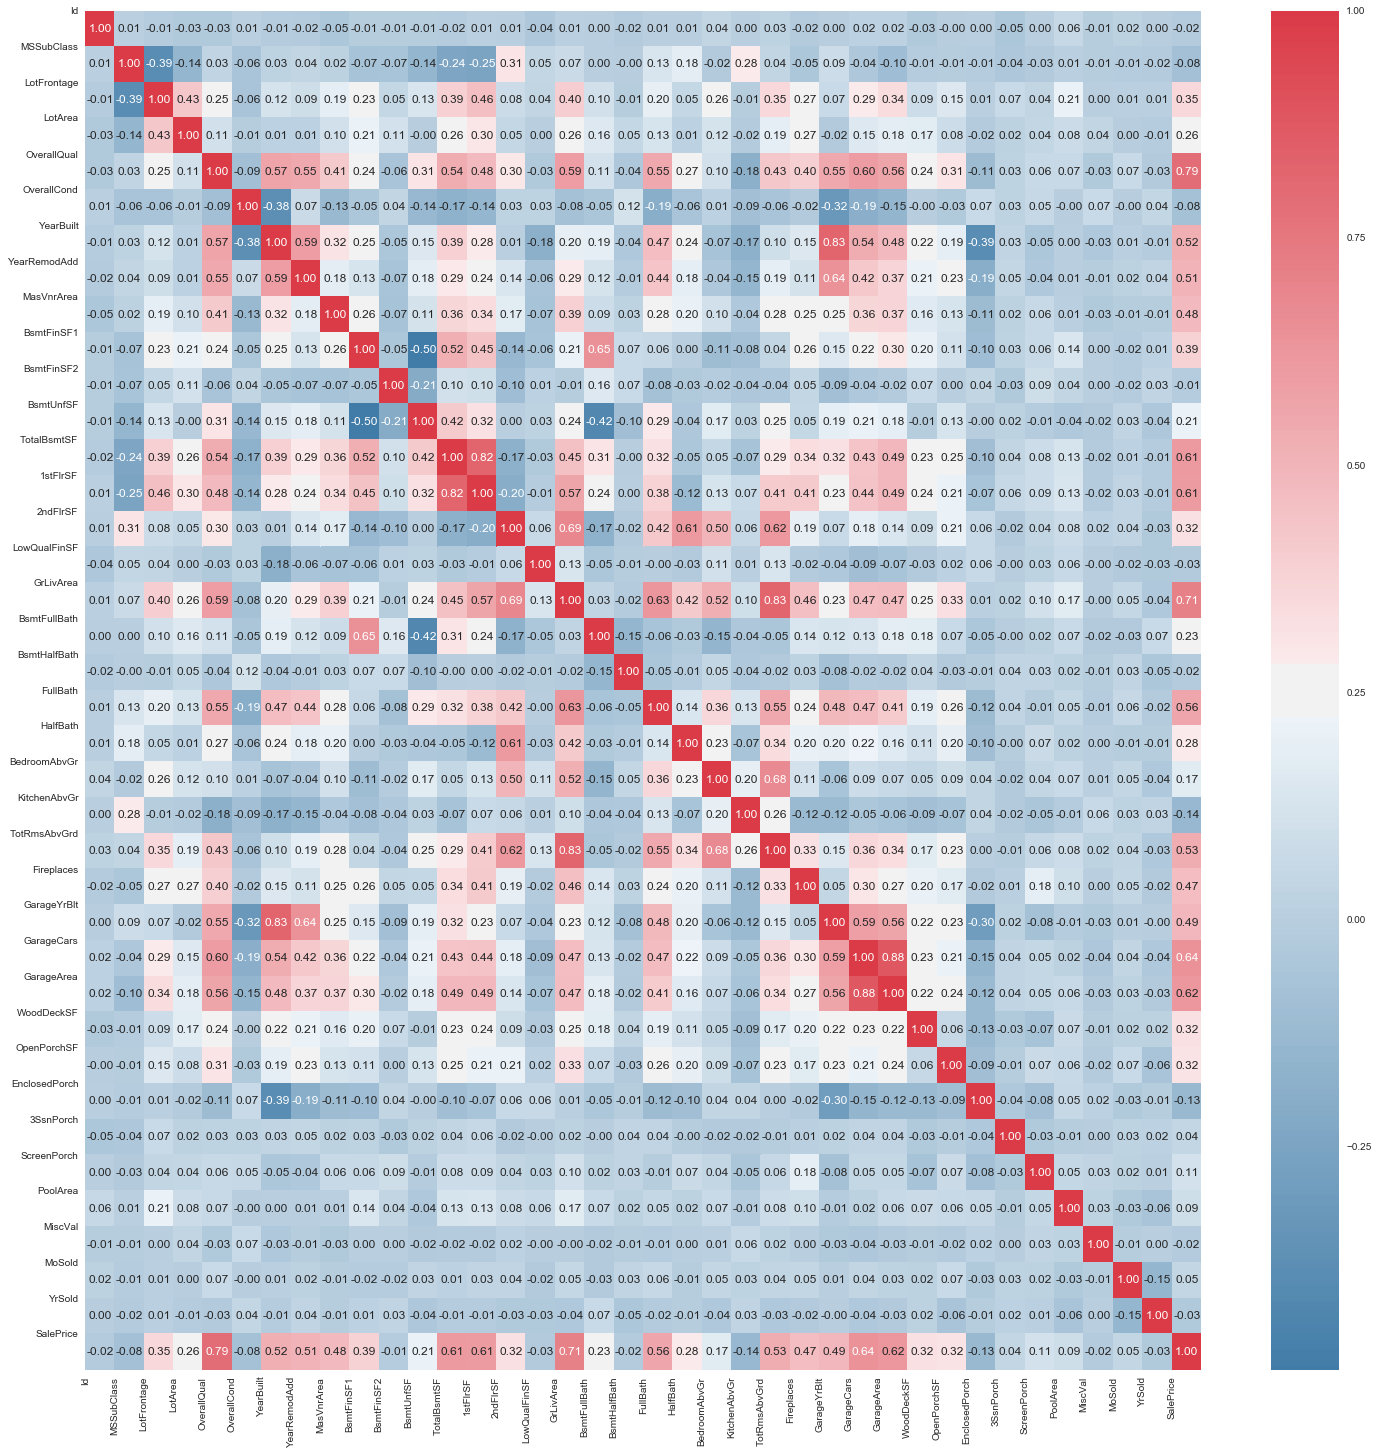

In [9]:
fig, ax = plt.subplots(figsize=(25, 25))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(240, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(CorrelationMatrix, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(CorrelationMatrix.columns)), CorrelationMatrix.columns);
#Apply yticks
plt.yticks(range(len(CorrelationMatrix.columns)), CorrelationMatrix.columns)
#show plot
plt.show()

Feature extraction:

From the plot we can see that the most prominent features are (Setting the cutoff points as 0.5 correlation)


OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101


Now we inspect these features seperately 

For categorical values, we plot the boxplots; for Quantitative values, we plot the scatterplots


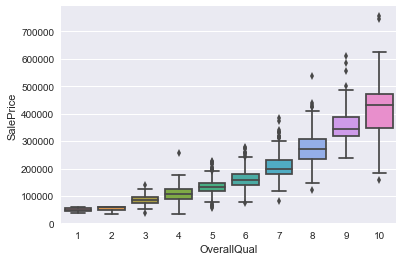

In [10]:
# OverallQual
feature = 'OverallQual'
data = pd.concat([dataset['SalePrice'], dataset[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)


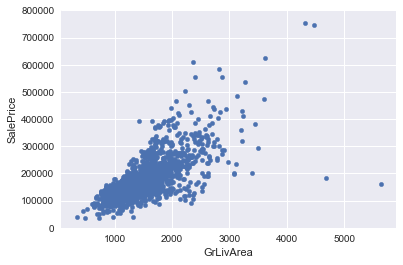

In [11]:
# GrLivArea

feature = 'GrLivArea'
data = pd.concat([dataset['SalePrice'], dataset[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))


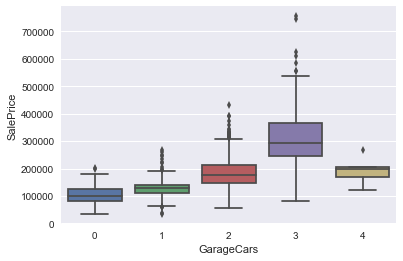

In [12]:
# GarageCars
feature = 'GarageCars'
data = pd.concat([dataset['SalePrice'], dataset[feature]], axis=1)
plot = sns.boxplot(x=feature, y="SalePrice", data=data)


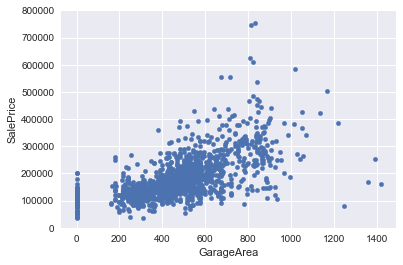

In [13]:
# GarageArea

feature = 'GarageArea'
data = pd.concat([dataset['SalePrice'], dataset[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

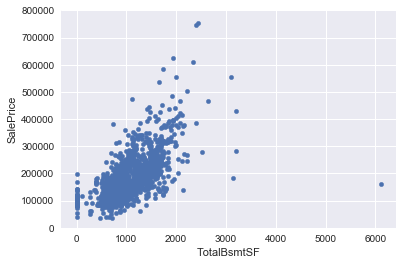

In [14]:
# TotalBsmtSF

feature = 'TotalBsmtSF'
data = pd.concat([dataset['SalePrice'], dataset[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

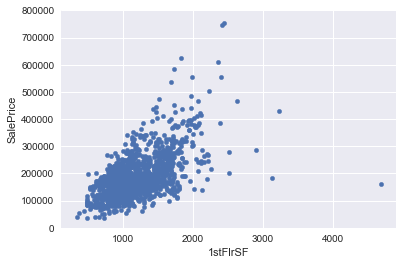

In [15]:
# 1stFlrSF

feature = '1stFlrSF'
data = pd.concat([dataset['SalePrice'], dataset[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

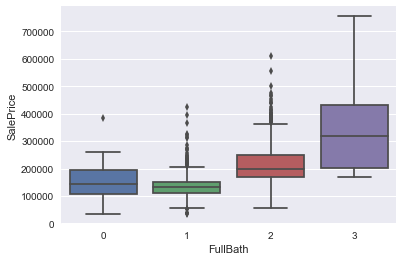

In [16]:
# FullBath
feature = 'FullBath'
data = pd.concat([dataset['SalePrice'], dataset[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

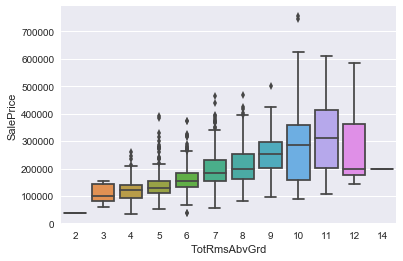

In [17]:
# TotRmsAbvGrd
feature = 'TotRmsAbvGrd'
data = pd.concat([dataset['SalePrice'], dataset[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

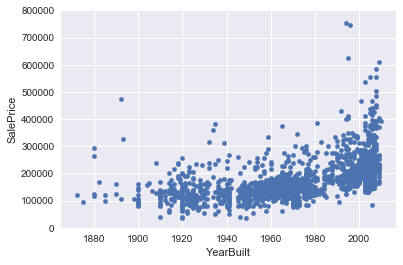

In [18]:
# YearBuilt

feature = 'YearBuilt'
data = pd.concat([dataset['SalePrice'], dataset[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

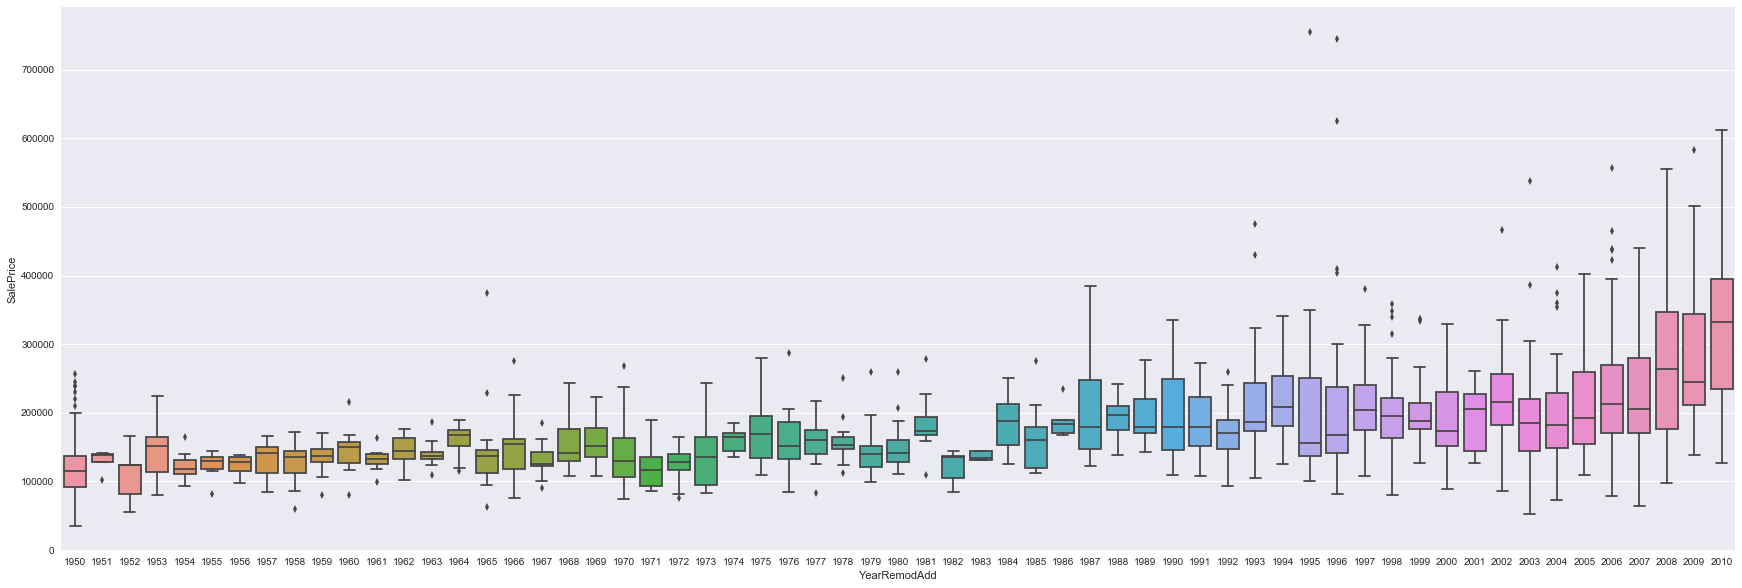

In [19]:
# YearRemodAdd
feature = 'YearRemodAdd'
data = pd.concat([dataset['SalePrice'], dataset[feature]], axis=1)

f, _ = plt.subplots(figsize=(30, 10))

plot = sns.boxplot(x=feature, y="SalePrice", data=data)


By reinspecting the heatmap plot, we notice that some features are correlated, i.e. we look at the top 12 most significant features

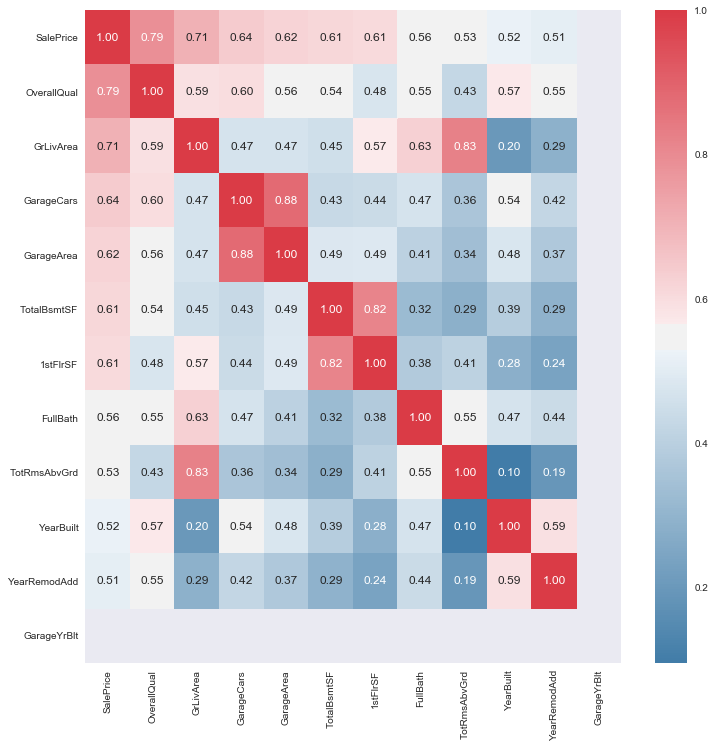

In [20]:
features = CorrelationMatrix.nlargest(12, "SalePrice")["SalePrice"].index
CorrelationMatrices = np.corrcoef(dataset[features].values.T)

fig, ax = plt.subplots(figsize=(12, 12))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(240, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(CorrelationMatrices, cmap=colormap, annot=True, fmt=".2f", yticklabels=features.values, xticklabels=features.values)


From this refined plot, we can see that 

OverallQual correlates with GrLivArea, GarageCars, YearBuilt;
GrLivArea correlates with 1stFlrSF, FullBath and TotRmsAbvGrd
YearBuilt correlates with YearRemodAdd

SalePrice
GrLivArea
GarageCars
1stFlrSF
FullBath
TotRmsAbvGrd
YearBuilt
YearRemodAdd

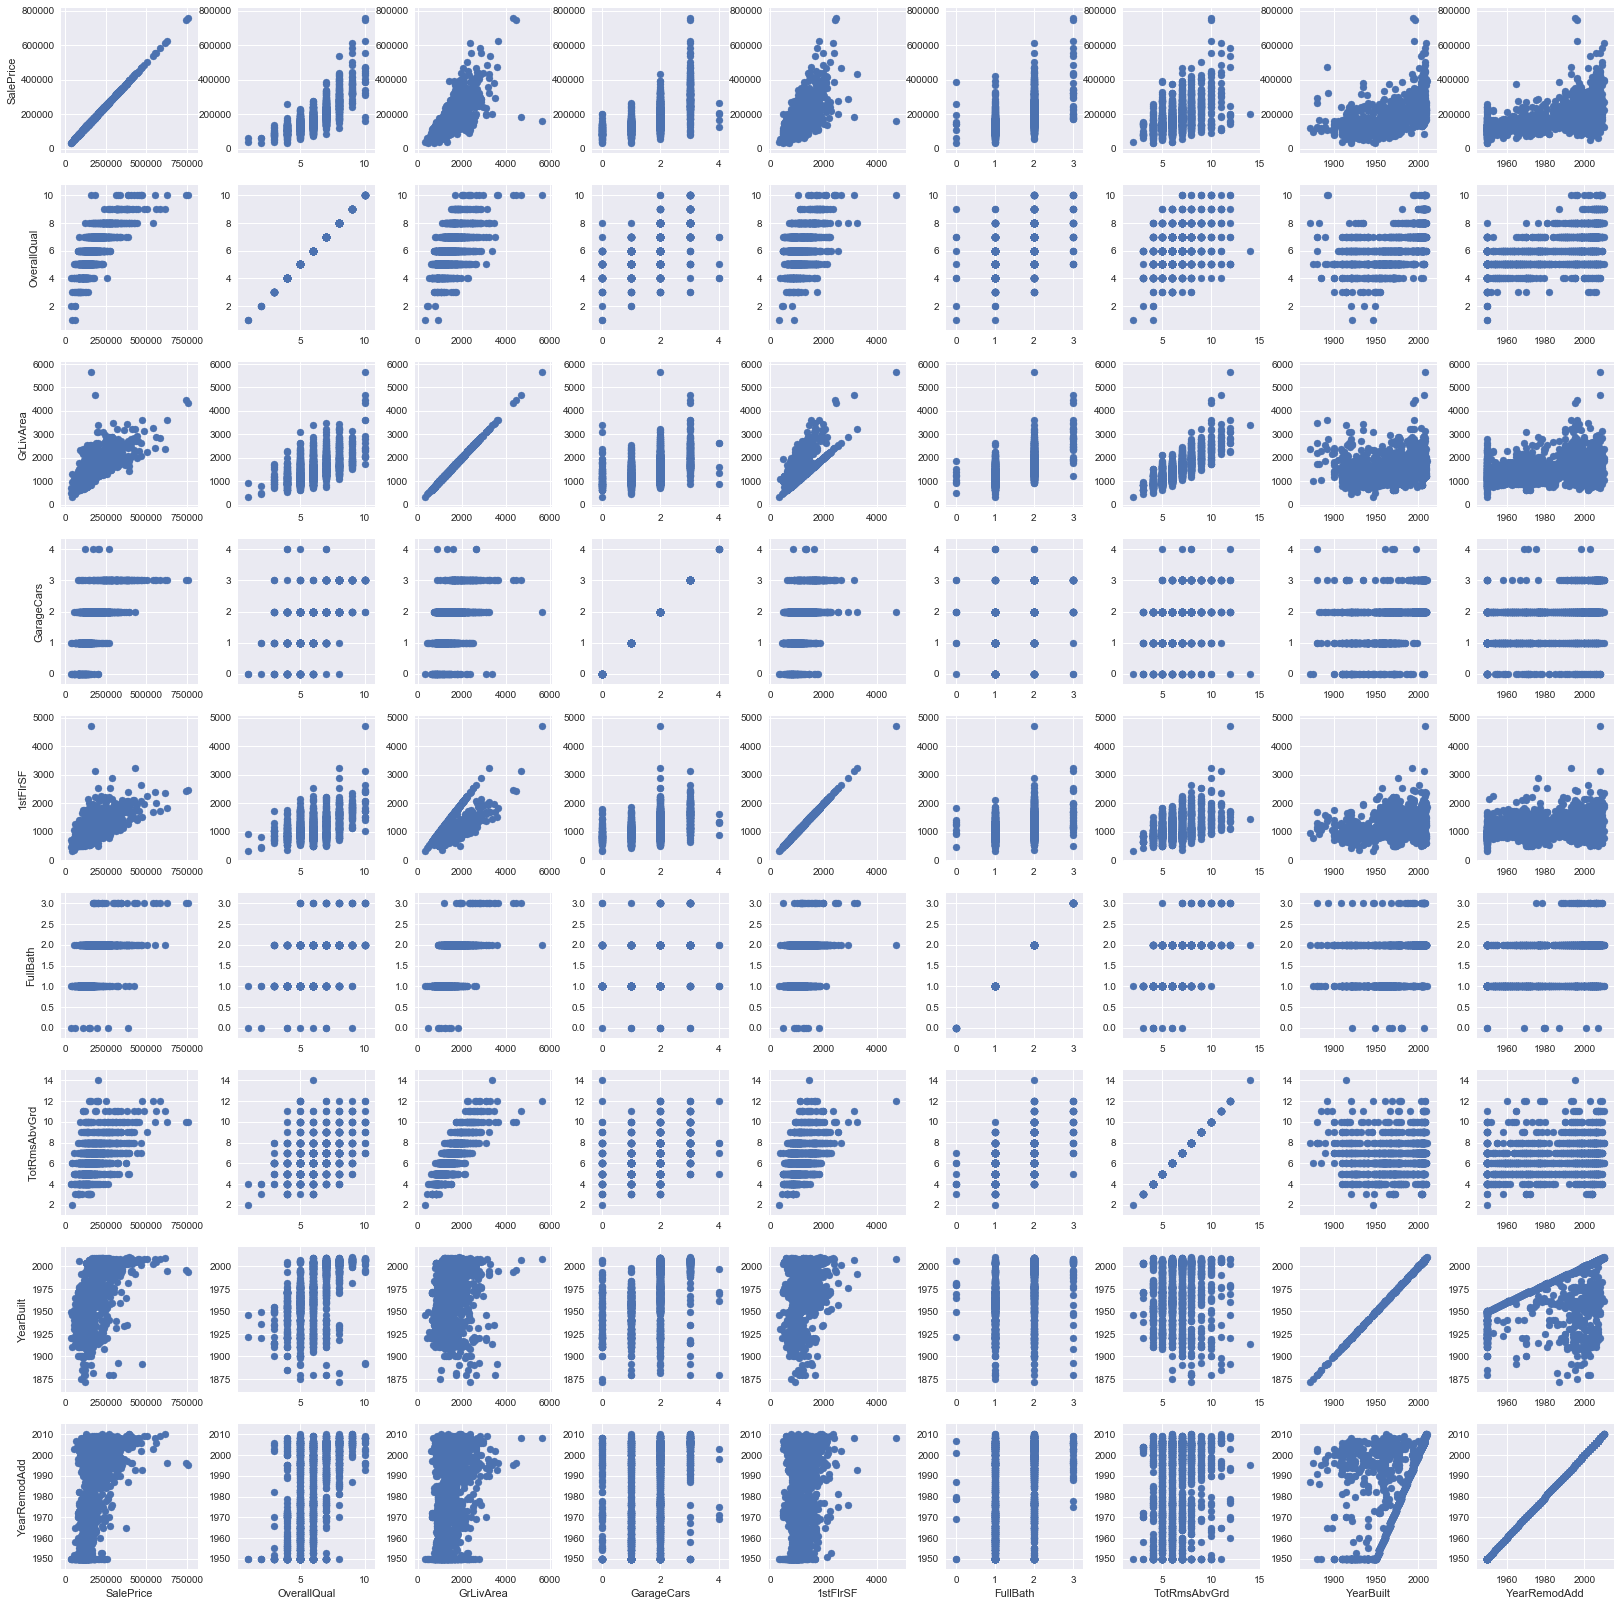

In [21]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd' ]

plot = sns.PairGrid(dataset[cols])

plot = plot.map(plt.scatter)


In [22]:
dataset[cols].values
# y = dataset['SalePrice'].values



array([[208500,      7,   1710, ...,      8,   2003,   2003],
       [181500,      6,   1262, ...,      6,   1976,   1976],
       [223500,      7,   1786, ...,      6,   2001,   2002],
       ..., 
       [266500,      7,   2340, ...,      9,   1941,   2006],
       [142125,      5,   1078, ...,      5,   1950,   1996],
       [147500,      5,   1256, ...,      6,   1965,   1965]])